# Section 1: Business Understanding

The goal of this notebook is to use the survey responses that data scientists gave to Kaggle's 2020 Machine Learning and Data Science survey, in order to answer the following questions:

#### Question 1: Do you need a PhD to get into data science?

#### Question 2: What programming languages are essential for data scientists?

#### Question 3: What platforms should we be using to learn the concepts and programming languages used in data science?

##### Imports

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Section 2: Data Understanding

#### Access and explore data

In [116]:
survey = pd.read_csv('kaggle-survey-2020/kaggle_survey_2020_responses.csv')
survey.shape

(20037, 355)

In [117]:
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#how many respondents?
print('Total number of respondents: ', survey.shape[0])

Total number of respondents:  20037


In [119]:
#how many countries?
countries = survey.Q3.value_counts()
print('total number of countries', len(countries.drop('In which country do you currently reside?')))

total number of countries 55


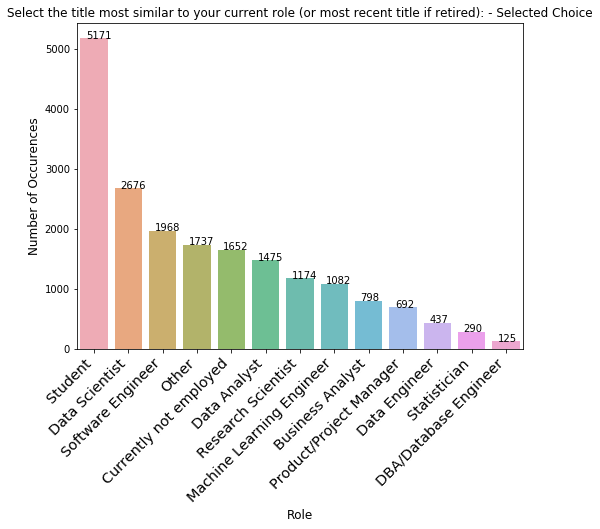

In [120]:
# how many people who took the survey are data scientists?
role_counts = survey['Q5'].value_counts()[:-1]

question = survey.loc[0, 'Q5']

plot_value_counts(role_counts, question, 'Role', save=True)

# Section 3: Data Preparation

The following functions are used to clean data, access columns of interest, and visualize the results

In [121]:
def plot_value_counts(val_counts, title, x_label, y_label="Number of Occurences", pct=False, save=False):
    """
    Plot the number of occurences per item
    
    inputs
    val_counts -- a pandas series containing index and count
    title -- the title of the plot you are making
    x_label -- the label of the horizontal axis
    y_label -- the label of the vertical axis
    pct -- False if displaying a count, True if displaying a percentage
    save -- False if not saving plot, True if you would like to save the plot
    """
    plt.figure(figsize=(8,6))
    ax = sns.barplot(val_counts.index, val_counts.values, alpha=0.8)
    plt.title(title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
        )

    for p in ax.patches:
        x_center = p.get_x() + (p.get_width() / 5)
        y = p.get_height()
        if pct:
            ax.annotate(str(p.get_height()), (x_center, y))
        else:
            ax.annotate(str(int(p.get_height())), (x_center, y))
        

    if save:
        plt.savefig(title, bbox_inches = "tight")
        
    plt.show()
    
    
def pull_columns_of_interest(question):
    """
    Several questions have multiple columns associated with them. This function will find all of the columns 
    associated with a particular question, and return a series containing the number of not NaN's of each column.
    
    question -- the question asked by the survey. 
    
    returns
    val_counts -- a series containing the number of not NaN values per column
    """
    
    columns_of_interest = []
    for col in survey.columns:
        if question in survey.loc[0, col]:
            columns_of_interest.append(col)
            
    df = data_scientists[columns_of_interest]
    
    new_index_map = {}
    for col in df.columns:
        
        new_index_map[col] = df[col].mode()[0]
        
    
    
    """
    The question was a select all that apply question, so NaN indicates that the survey taker did not check a 
    particular language. The number of non-null objects in each column is the number of respondents who selected 
    a particular choice that they agree with or use.
    """
    val_counts = df.notna().sum()

    
    val_counts = val_counts.rename(new_index_map).sort_values(ascending=False)
        
    return val_counts

In [122]:
# create a subset of the survey that only includes data scientists
data_scientists = survey[survey['Q5']=='Data Scientist']
print('number of data scientists in survey: ', data_scientists.shape[0])
data_scientists.head()

number of data scientists in survey:  2676


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,874,30-34,Man,Russia,Bachelor’s degree,Data Scientist,< 1 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,983,22-24,Man,Indonesia,Master’s degree,Data Scientist,3-5 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,664,18-21,Man,India,Bachelor’s degree,Data Scientist,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Section 4: Evaluation of results

#### Question 1: Do you need a PhD to get into data science?

To answer this question we will observe the highest level of education attained by data scientists

##### Analyze

In [123]:
education = data_scientists.Q4.value_counts()
print('Highest level of formal education attained or plan to attain within the next 2 years:')
education

Highest level of formal education attained or plan to attain within the next 2 years:


Master’s degree                                                      1369
Bachelor’s degree                                                     648
Doctoral degree                                                       458
Professional degree                                                    86
Some college/university study without earning a bachelor’s degree      64
I prefer not to answer                                                 36
No formal education past high school                                   15
Name: Q4, dtype: int64

##### Visualize

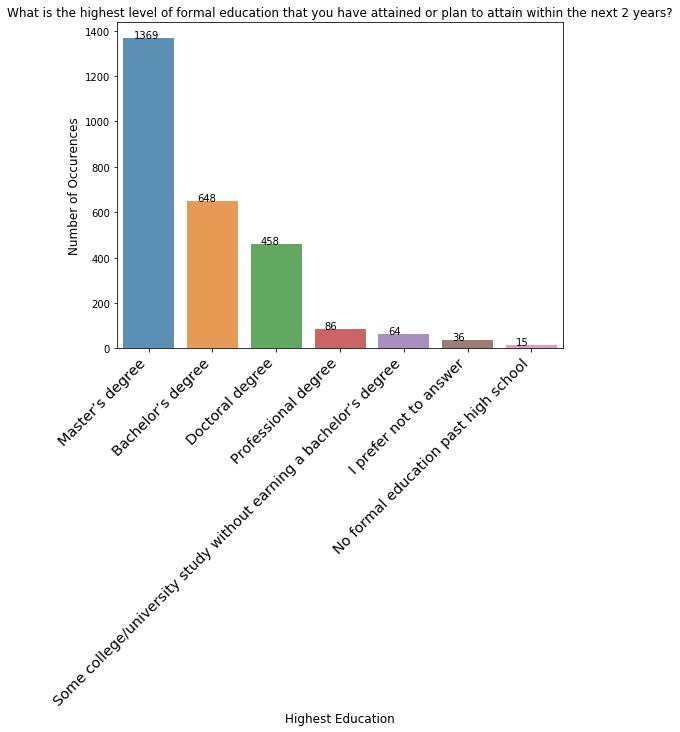

In [124]:
question = survey.loc[0, 'Q4']

plot_value_counts(education, question, 'Highest Education',save=True)

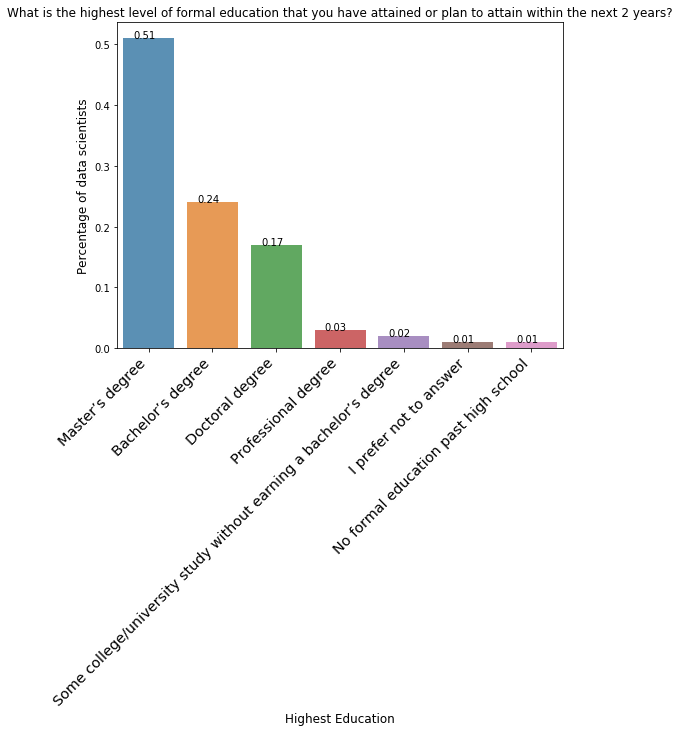

In [125]:
plot_value_counts(round(education/data_scientists.shape[0], 2), question, 'Highest Education', 
                  y_label="Percentage of data scientists",pct=True)

The majority of data scientists have a master's degree, but enough data scientists have only a bachelor's degree to give me the confidence I need to start applying for jobs without furthering my education beyond a bachelor's.

#### Question 2: What programming languages are essential for data scientists?

To answer this question we will investigate which programming languages are used by data scientists on a regular basis.

##### Analyze

In [126]:
language_counts = pull_columns_of_interest('What programming languages do you use on a regular basis?')
language_counts

Python        2453
SQL           1473
R              975
Bash           405
C++            323
Java           305
Javascript     290
C              247
Other          245
MATLAB         242
Julia           71
Swift           14
None             5
dtype: int64

In [127]:
# average number of languages used by data scientists on a regular basis
print('average number of languages used per data scientist: ', 
      language_counts.drop('None').sum()/data_scientists.shape[0])

average number of languages used per data scientist:  2.631913303437967


##### Visualize

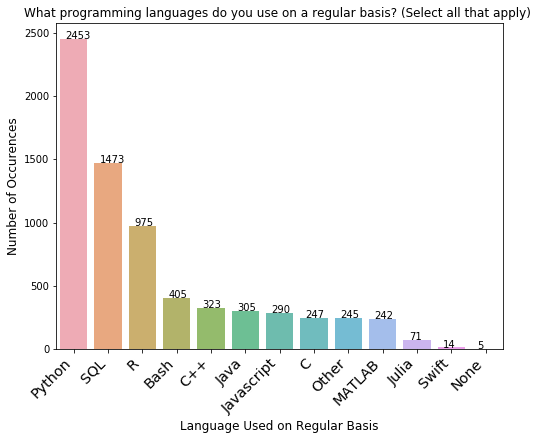

In [128]:
question = survey.loc[0, 'Q7_Part_1'].split('- Selected Choice -')[0]

plot_value_counts(language_counts, question, 'Language Used on Regular Basis', save=True)

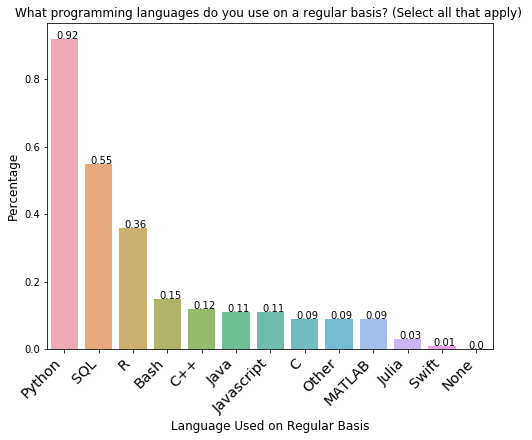

In [129]:
pct = (language_counts / data_scientists.shape[0]).round(2)

plot_value_counts(pct, question, 'Language Used on Regular Basis', 'Percentage', pct=True)

Python is used by 92% of data scientists on a regular basis! That's practically all of them! But beware... don't just learn Python. The average data scientist uses 2.6 programming languages on a regular basis.

#### Question 3: What platforms should we be using to learn the concepts and programming languages used in data science?

To answer this question we will investigate which learning platforms have been used by data scientists.

##### Analyze

In [130]:
platform_counts = pull_columns_of_interest(
    'On which platforms have you begun or completed data science courses?'
    )

In [131]:
platform_counts

Coursera                                                                  1410
Udemy                                                                      777
University Courses (resulting in a university degree)                      689
Kaggle Learn Courses                                                       675
DataCamp                                                                   663
edX                                                                        500
Udacity                                                                    428
LinkedIn Learning                                                          276
Fast.ai                                                                    264
Other                                                                      222
Cloud-certification programs (direct from AWS, Azure, GCP, or similar)     203
None                                                                       165
dtype: int64

In [132]:
#average number of platforms...
print('number of platforms used: ',platform_counts.drop('None').sum())
print('average number of platforms used: ', platform_counts.drop('None').sum()/data_scientists.shape[0])
print('pct of data scientists who do not use any online learning platform: ', 
      platform_counts['None']/data_scientists.shape[0])

number of platforms used:  6107
average number of platforms used:  2.282137518684604
pct of data scientists who do not use any online learning platform:  0.061659192825112105


##### Visualize

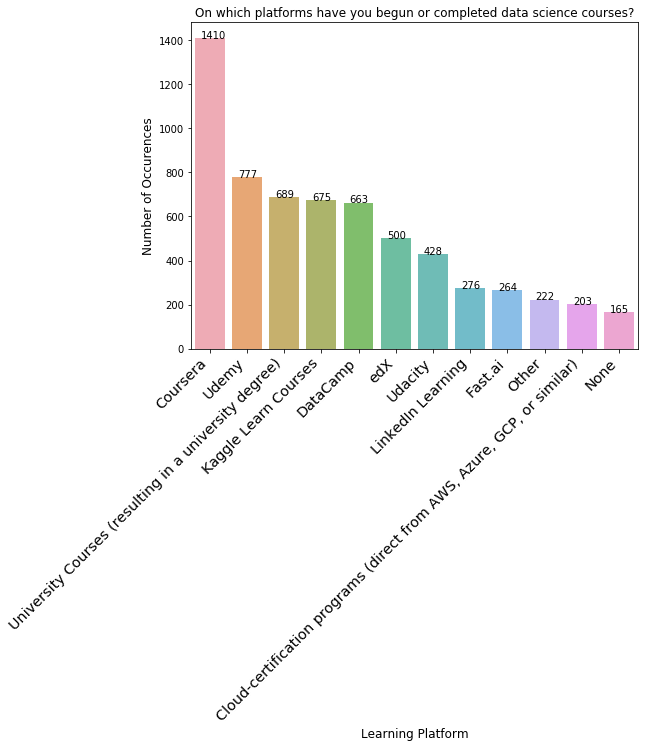

In [133]:
plot_value_counts(platform_counts, 'On which platforms have you begun or completed data science courses?',
                 'Learning Platform', save=True)

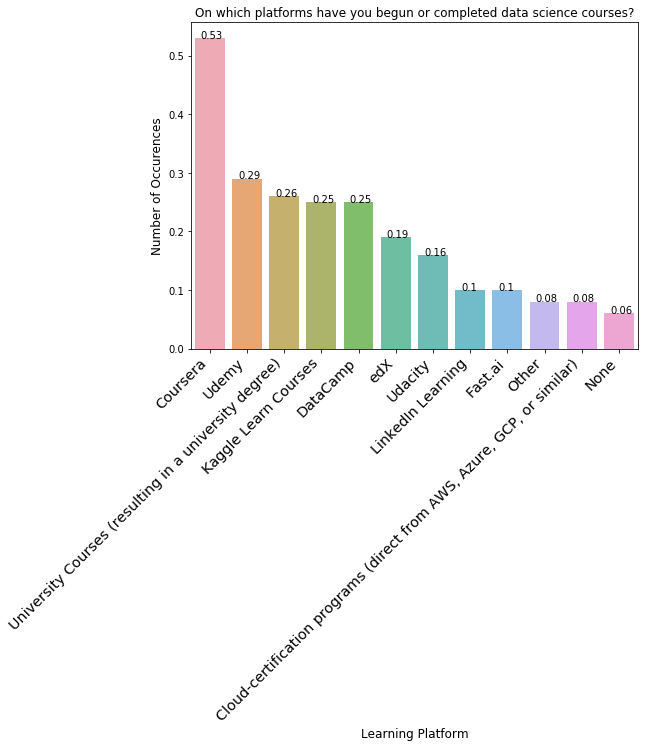

In [134]:
plot_value_counts(round(platform_counts/data_scientists.shape[0], 2), 
                  'On which platforms have you begun or completed data science courses?',
                 'Learning Platform', pct=True)

More than half of the data scientists have used Coursera. Only 6% of data scientists have never used a learning platform. The average number of learning platforms used per data scientist is 2.3